In [1]:
from __future__ import print_function
import morphs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pair_df = morphs.load.pop_pair_df()

In [3]:
morphs.data.parse.morph_dim(pair_df)

In [4]:
def morph_xcor_viz(pair_df, title='',
                   row_order='abcdef', col_order='cdefgh'):
    g = sns.FacetGrid(pair_df, col='greater_dim', row='lesser_dim',
                      row_order=row_order, col_order=col_order)
    g.map_dataframe(_morph_xcor_viz)
    g.set_titles('{row_name}     to     {col_name}')
    g.set_axis_labels('Morph Position', 'Morph Position')
    if title:
        plt.subplots_adjust(top=0.95)
        g.fig.suptitle(title)
    g.despine(top=True, right=True, left=True, bottom=True)
    g.set(xticks=[], yticks=[])


def _morph_xcor_viz(**kwargs):
    data = kwargs.pop("data")
    x_dist_df = data.groupby(['lesser_morph_pos', 'greater_morph_pos'])['red_neural_cosine_dist'].agg(np.mean).reset_index()
    xyz = x_dist_df.values
    non_diagonal_xyz = xyz[xyz[:,0] != xyz[:,1], :]
    xyz = np.concatenate((xyz, non_diagonal_xyz[:,[1,0,2]]))
    grid_x, grid_y = np.mgrid[1:129, 1:129]
    interpolated_grid = sp.interpolate.griddata(xyz[:,:2], xyz[:,2], (grid_x, grid_y), method='nearest')
    ax = plt.gca()
    ax.imshow(-interpolated_grid)

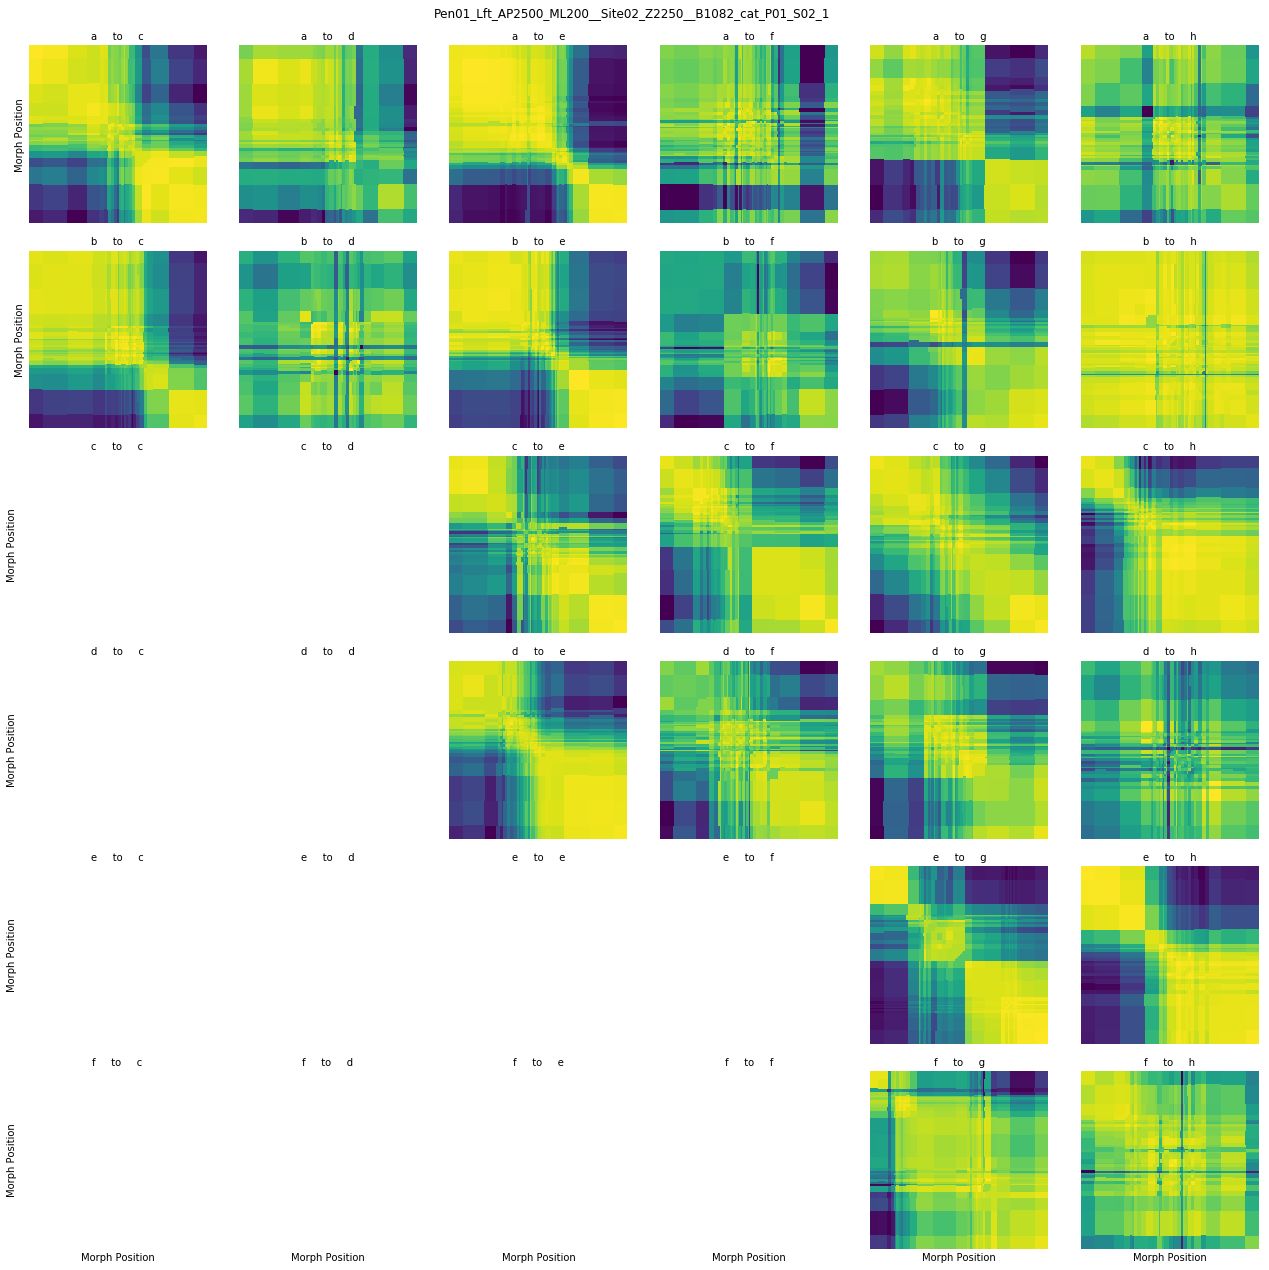

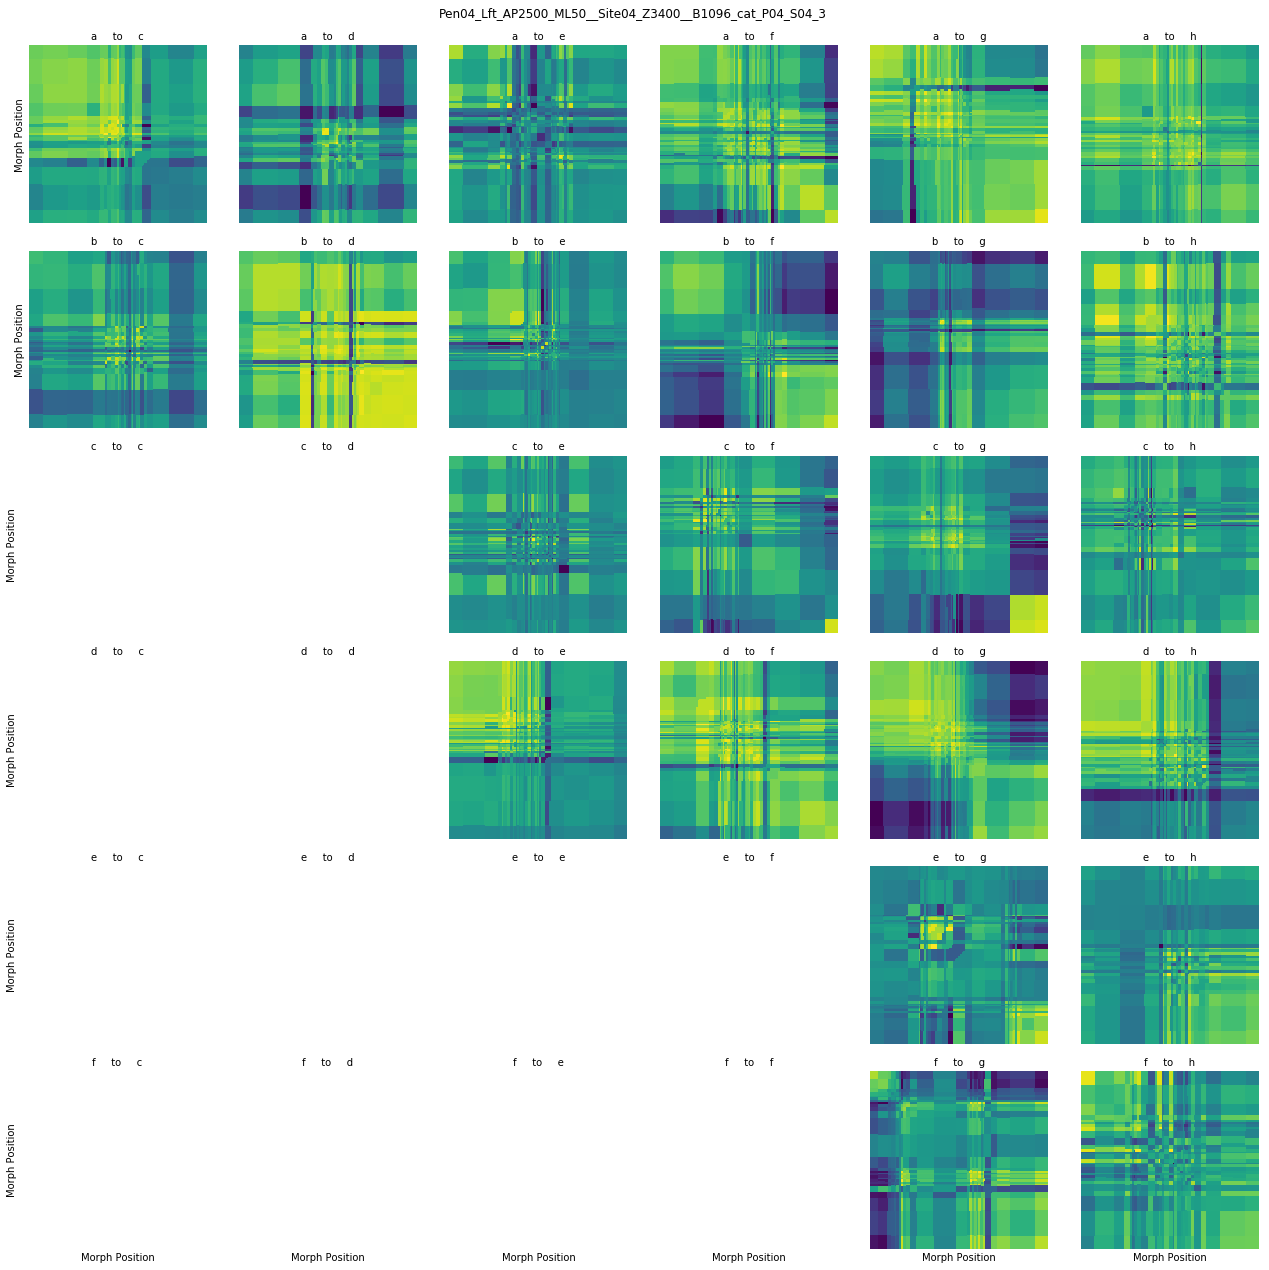

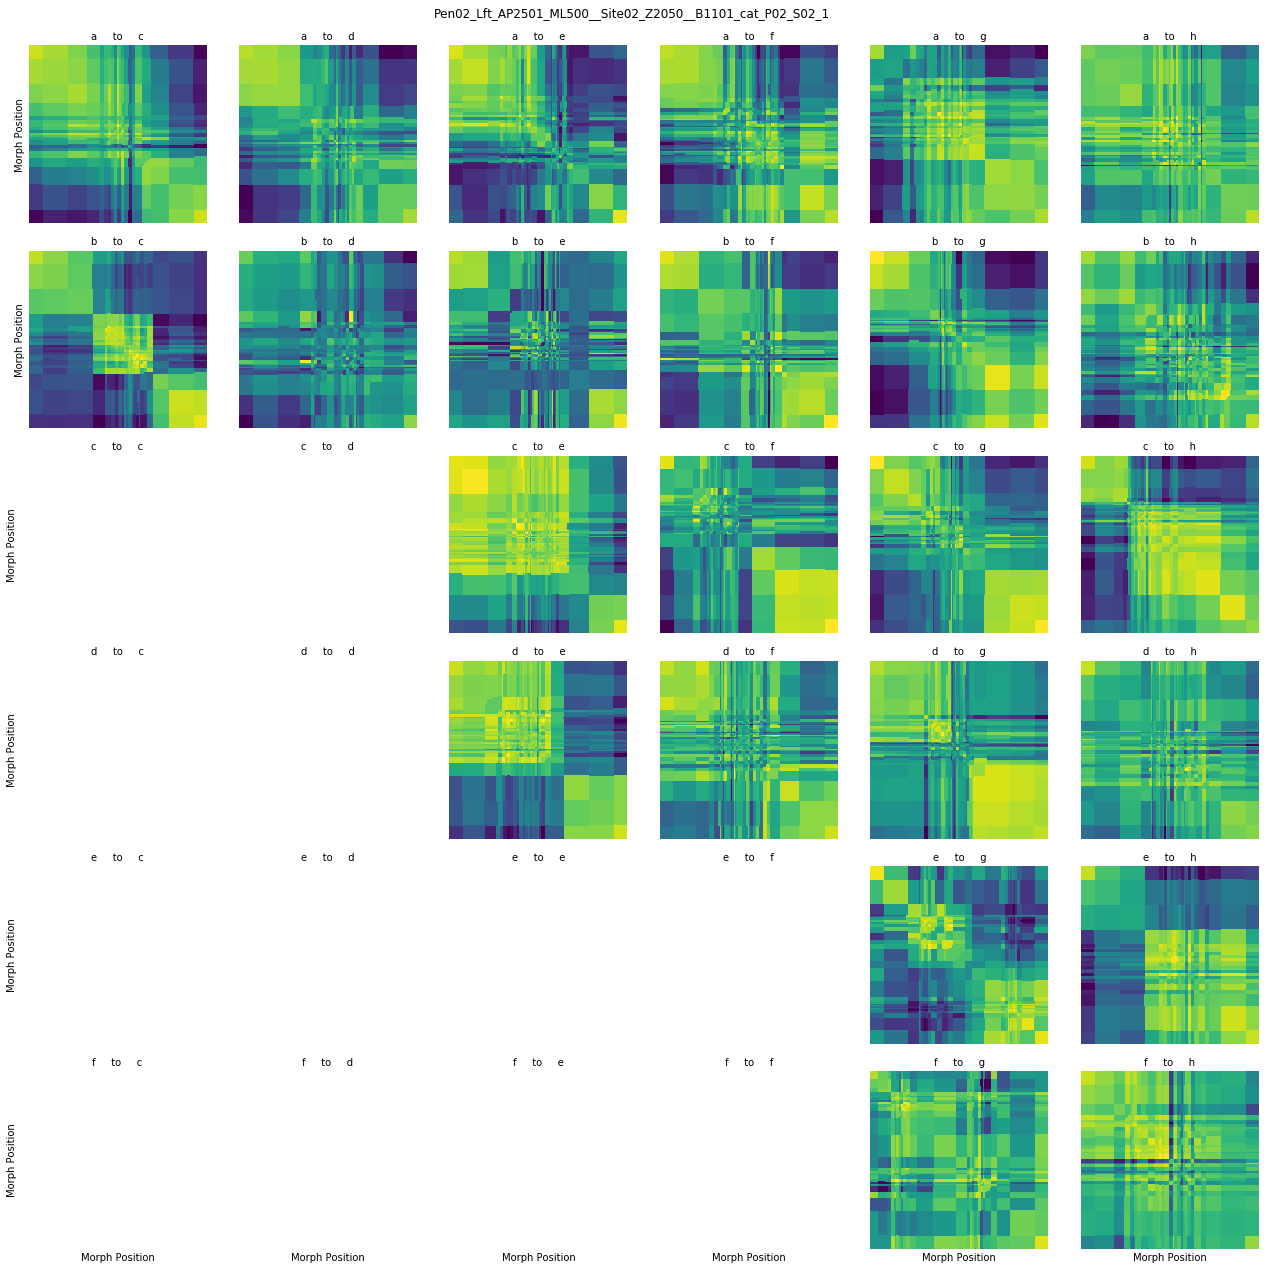

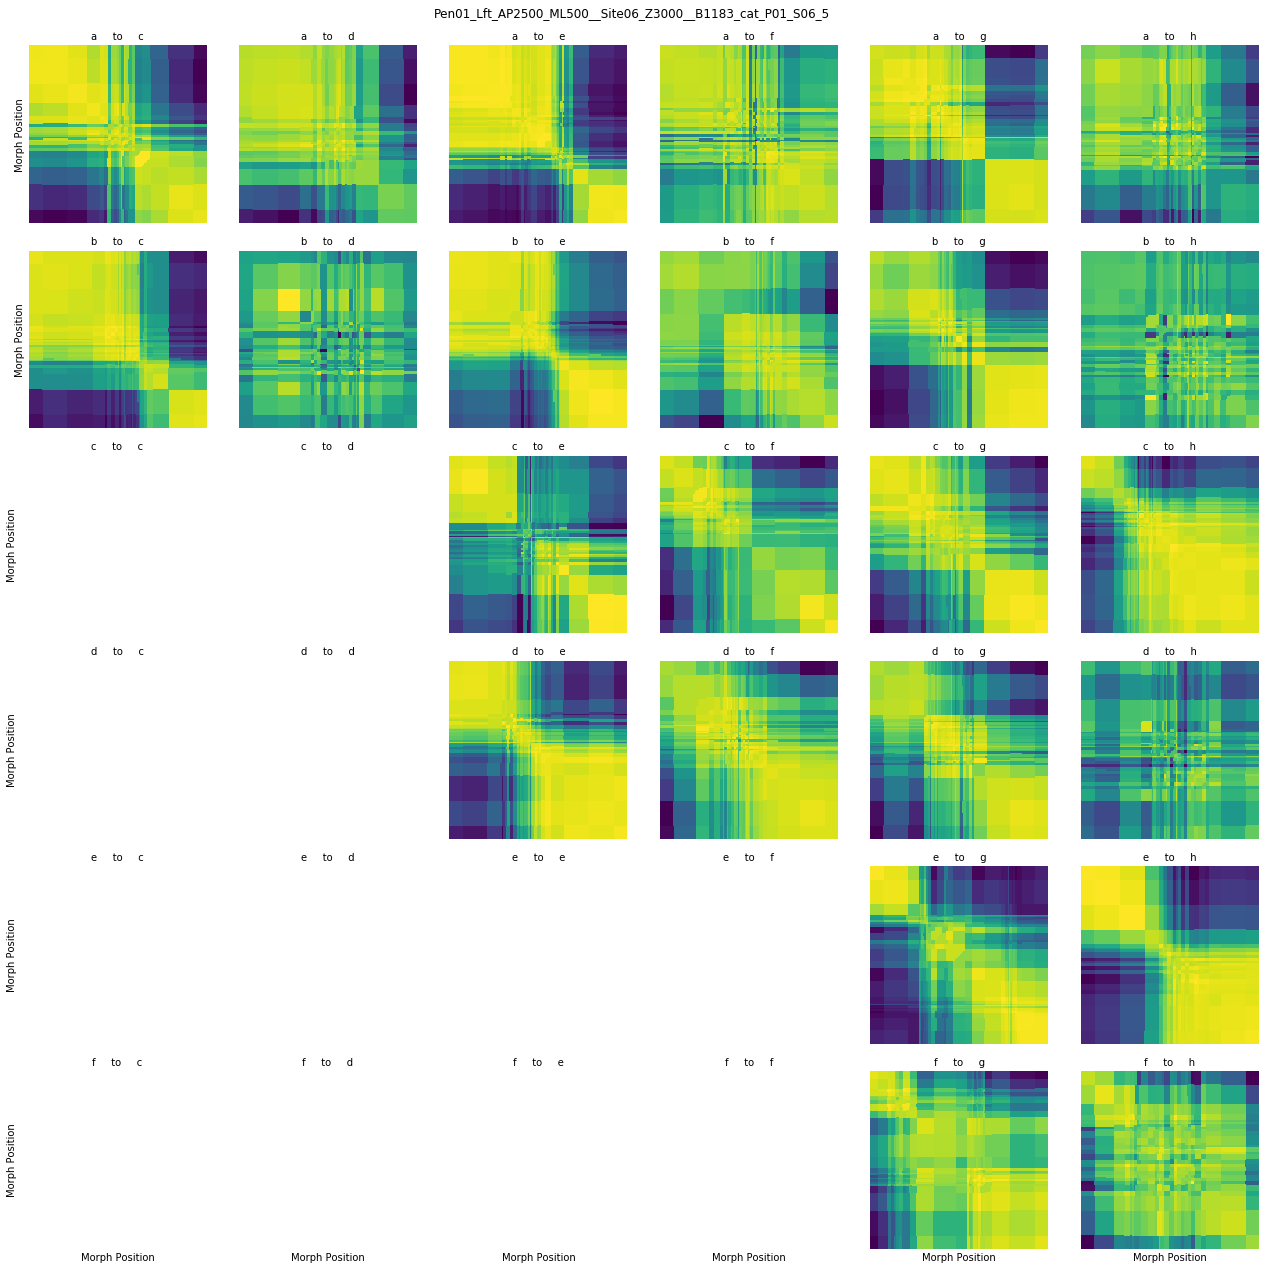

In [5]:
for i, (block_path, block_group) in enumerate(pair_df.groupby('block_path')):
    if i % 10 == 0:
        morph_xcor_viz(block_group, title=morphs.data.parse.blockpath_name(block_path))